# Project 1 Starter Notebook

This notebook is meant to help you start up easily.
It will assume you have downloaded the relevant data.
For more information about the competition, refer to the kaggle pages.

Let's load in and inspect all data first:

In [174]:
import pandas as pd
import numpy as np

# read in data
bicycle_data = pd.read_csv("input/bicycle-counter-prediction/train_data.csv")
bicycle_data.head()

,Date_hour,Totaal
0,2023-01-01T00,111.0
1,2023-01-01T01,201.0
2,2023-01-01T02,170.0
3,2023-01-01T03,144.0
4,2023-01-01T04,155.0


In [175]:
test_data = pd.read_csv("input/bicycle-counter-prediction/test_data.csv")
test_data.head()

,Id,Date_hour
0,0,2023-07-01T00
1,1,2023-07-01T01
2,2,2023-07-01T02
3,3,2023-07-01T03
4,4,2023-07-01T04


In [176]:
# read in data
weather_data = pd.read_csv("input/bicycle-counter-prediction/open-meteo-51.10N3.70E13m.csv", skiprows=2)
weather_data.head()

,time,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),is_day ()
0,2023-01-01T00:00,15.8,9.3,0.0,0
1,2023-01-01T01:00,15.3,8.9,0.0,0
2,2023-01-01T02:00,14.7,8.8,0.0,0
3,2023-01-01T03:00,14.3,9.0,0.0,0
4,2023-01-01T04:00,13.8,9.3,0.0,0


The weather data downloaded from open meteo carries times in a slightly different format than the bicycle counter data.
Note that you are encouraged to create and download your own weather data with more features.
The following code converts this data:

In [177]:
import datetime

weather_data["Date_hour"] = weather_data["time"].str.split(':', expand = True)[0]
weather_data = weather_data.drop("time", axis = 1)
#weather_data['Date_hour'] = pd.to_datetime(weather_data['Date_hour'])
weather_data['Weekday'] = pd.to_datetime(weather_data['Date_hour']).dt.strftime('%A')

weather_data.head()

,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),is_day (),Date_hour,Weekday
0,15.8,9.3,0.0,0,2023-01-01T00,Sunday
1,15.3,8.9,0.0,0,2023-01-01T01,Sunday
2,14.7,8.8,0.0,0,2023-01-01T02,Sunday
3,14.3,9.0,0.0,0,2023-01-01T03,Sunday
4,13.8,9.3,0.0,0,2023-01-01T04,Sunday


In [178]:
dummies = pd.get_dummies(weather_data.Weekday)
dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [179]:
weather_data = pd.concat([weather_data, dummies], axis=1)
weather_data.head()

,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),is_day (),Date_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,15.8,9.3,0.0,0,2023-01-01T00,0,0,0,1,0,0,0
1,15.3,8.9,0.0,0,2023-01-01T01,0,0,0,1,0,0,0
2,14.7,8.8,0.0,0,2023-01-01T02,0,0,0,1,0,0,0
3,14.3,9.0,0.0,0,2023-01-01T03,0,0,0,1,0,0,0
4,13.8,9.3,0.0,0,2023-01-01T04,0,0,0,1,0,0,0


The following code merges the bicycle data with the weather data to get a train set:

In [180]:
train_data = weather_data.merge(bicycle_data, on = "Date_hour")
train_data.head()

,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),is_day (),Date_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Totaal
0,15.8,9.3,0.0,0,2023-01-01T00,0,0,0,1,0,0,0,111.0
1,15.3,8.9,0.0,0,2023-01-01T01,0,0,0,1,0,0,0,201.0
2,14.7,8.8,0.0,0,2023-01-01T02,0,0,0,1,0,0,0,170.0
3,14.3,9.0,0.0,0,2023-01-01T03,0,0,0,1,0,0,0,144.0
4,13.8,9.3,0.0,0,2023-01-01T04,0,0,0,1,0,0,0,155.0


The following does the same but then for the test set:

In [181]:
test_data = weather_data.merge(test_data, on = "Date_hour")
test_data.head()

,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),is_day (),Date_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Id
0,18.0,15.7,0.0,0,2023-07-01T00,0,0,1,0,0,0,0,0
1,17.7,15.3,0.0,0,2023-07-01T01,0,0,1,0,0,0,0,1
2,17.4,15.0,0.0,0,2023-07-01T02,0,0,1,0,0,0,0,2
3,17.2,15.0,0.0,0,2023-07-01T03,0,0,1,0,0,0,0,3
4,17.1,15.3,0.0,1,2023-07-01T04,0,0,1,0,0,0,0,4


In [182]:
ground_truth = pd.read_csv("input/bicycle-counter-prediction/fietstelpaal-coupure-links-2023-gent.csv", sep = ";")
ground_truth.head()

,﻿Code,Locatie,Datum,Uur5Minuten,Ordening,Totaal,Tegenrichting,Hoofdrichting
0,COU,Coupure-Links,2023-01-01,0:00:00,2023-01-01T00:00:00+01:00,7.0,4.0,3.0
1,COU,Coupure-Links,2023-01-01,0:05:00,2023-01-01T00:05:00+01:00,2.0,0.0,2.0
2,COU,Coupure-Links,2023-01-01,0:10:00,2023-01-01T00:10:00+01:00,1.0,0.0,1.0
3,COU,Coupure-Links,2023-01-01,0:15:00,2023-01-01T00:15:00+01:00,8.0,4.0,4.0
4,COU,Coupure-Links,2023-01-01,0:20:00,2023-01-01T00:20:00+01:00,5.0,2.0,3.0


In [183]:
gold_data = ground_truth.copy()
gold_data["Date_hour"] = ground_truth['Ordening'].str.extract(r'^(.*?T\d{2})..')
gold_data = gold_data.groupby(['Datum', 'Date_hour'])['Totaal'].sum().reset_index(name ='Totaal')
gold_data = weather_data.merge(gold_data, on = "Date_hour")
gold_data.head()

,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),is_day (),Date_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Datum,Totaal
0,15.8,9.3,0.0,0,2023-01-01T00,0,0,0,1,0,0,0,2023-01-01,111.0
1,15.3,8.9,0.0,0,2023-01-01T01,0,0,0,1,0,0,0,2023-01-01,201.0
2,14.7,8.8,0.0,0,2023-01-01T02,0,0,0,1,0,0,0,2023-01-01,170.0
3,14.3,9.0,0.0,0,2023-01-01T03,0,0,0,1,0,0,0,2023-01-01,144.0
4,13.8,9.3,0.0,0,2023-01-01T04,0,0,0,1,0,0,0,2023-01-01,155.0


In [184]:
gtest_data = gold_data[(gold_data['Datum'] >= '2023-07-01') & (gold_data['Datum'] <= '2023-07-31')]
gtest_data.head()

,temperature_2m (°C),apparent_temperature (°C),precipitation (mm),is_day (),Date_hour,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Datum,Totaal
4343,18.0,15.7,0.0,0,2023-07-01T00,0,0,1,0,0,0,0,2023-07-01,150.0
4344,17.7,15.3,0.0,0,2023-07-01T01,0,0,1,0,0,0,0,2023-07-01,92.0
4345,17.4,15.0,0.0,0,2023-07-01T02,0,0,1,0,0,0,0,2023-07-01,49.0
4346,17.2,15.0,0.0,0,2023-07-01T03,0,0,1,0,0,0,0,2023-07-01,36.0
4347,17.1,15.3,0.0,1,2023-07-01T04,0,0,1,0,0,0,0,2023-07-01,57.0


## Models

### Preprocessing

['temperature_2m (°C)', 'precipitation (mm)', 'is_day ()', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


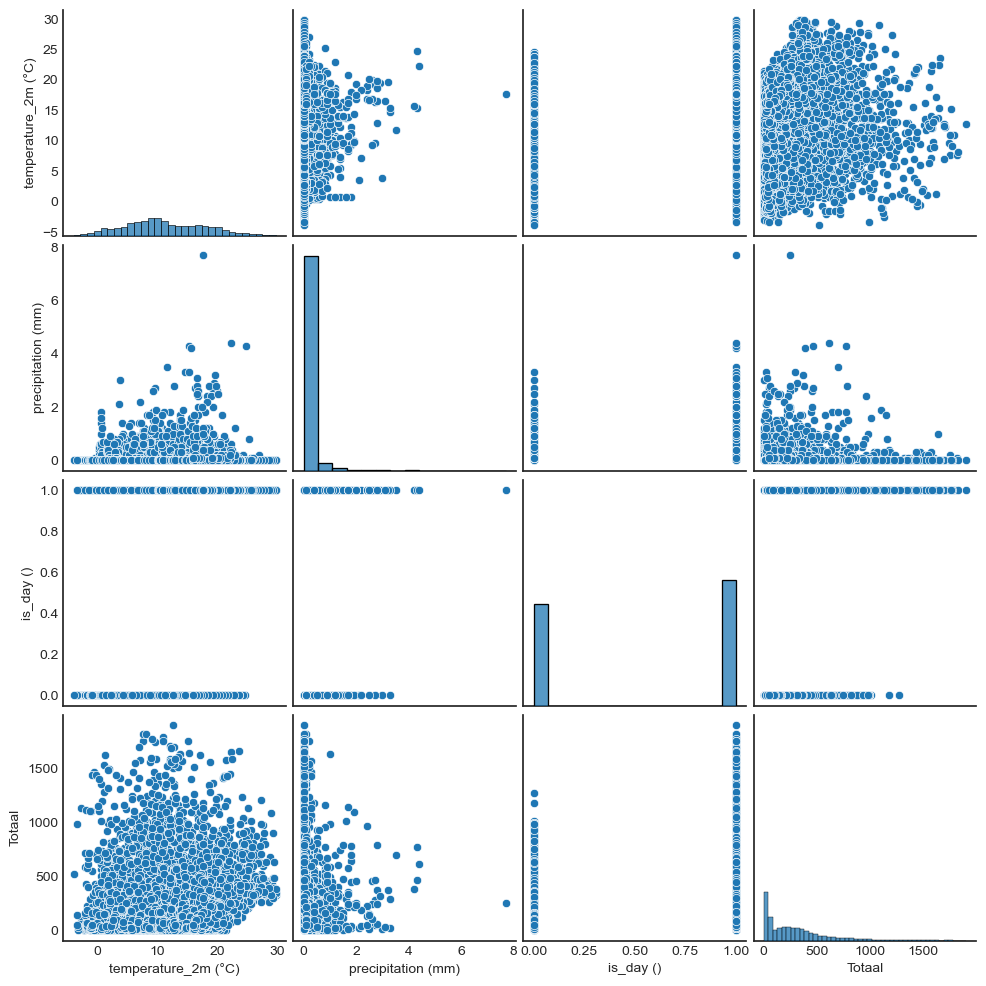

In [187]:
import seaborn as sns
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plot_features = ['temperature_2m (°C)', 'precipitation (mm)', 'is_day ()']
features = plot_features + weekdays
print(features)
sns.pairplot(gold_data.loc[:,plot_features + ['Totaal']])

In [188]:
# Function to compute MSE
def compute_MSE(y_true, y_predicted):
    """Obtain MSE between true y's and predicted y's"""
    return(np.mean((y_true-y_predicted)**2))

In [189]:
y_train = train_data["Totaal"]
X0_train = np.ones((len(y_train),1))
X_train = np.hstack((X0_train, train_data.loc[:, features]))

y_test = gtest_data["Totaal"]
X0_test = np.ones((len(y_test),1))
X_test = np.hstack((X0_test, gtest_data.loc[:, features]))

### Linear Regression

In [190]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression() # call an instance of the class LinearRegression

LinReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = LinReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = LinReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = LinReg.score(X_train, y_train) # Training set R²
R_test = LinReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 70996.23785676157
Test set MSE: 44472.83810639346
Train set R²: 0.2977287094968982
Test set R²: -0.2552564941973985


### Poisson Regression

In [192]:
from sklearn.linear_model import PoissonRegressor

PoiReg = PoissonRegressor(max_iter=1000) # call an instance of the class LinearRegression

PoiReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = PoiReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = PoiReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = PoiReg.score(X_train, y_train) # Training set R²
R_test = PoiReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 68316.92160917196
Test set MSE: 46543.60036655031
Train set R²: 0.34731303440304007
Test set R²: -0.024973240358251436


### Decision Tree Regression

In [193]:
from sklearn.tree import DecisionTreeRegressor

DTReg = DecisionTreeRegressor()

DTReg.fit(X_train, y_train) # fit the model on the training data
y_hat_train = DTReg.predict(X_train) # predict training data
MSE_train = compute_MSE(y_train, y_hat_train) # Compute training set MSE

y_hat_test = DTReg.predict(X_test) # predict test data
MSE_test = compute_MSE(y_test, y_hat_test) # Test set MSE

R_train = DTReg.score(X_train, y_train) # Training set R²
R_test = DTReg.score(X_test, y_test) # Test set R²

print('Training set MSE: {}'.format(MSE_train))
print('Test set MSE: {}'.format(MSE_test))
print('Train set R²: {}'.format(R_train))
print('Test set R²: {}'.format(R_test))

Training set MSE: 24343.034757811325
Test set MSE: 112942.4773838859
Train set R²: 0.7592067558759822
Test set R²: -2.1878284418840437


## Submission

### Prediction

In [194]:
X0 = np.ones((len(test_data["Id"]),1))
X = np.hstack((X0, test_data.loc[:, features]))

LinReg_predictions = LinReg.predict(X)
PoiReg_predictions = PoiReg.predict(X)
DTReg_predictions = DTReg.predict(X)

predictions = {"LinReg": LinReg_predictions, "PoiReg": PoiReg_predictions, "DTReg": DTReg_predictions}

### Save results

In [195]:
# format predictions with Ids into dataframe and save to csv.

for model in predictions:
    file = pd.DataFrame([test_data["Id"], predictions[model]]).T
    file.columns = ["Id", "Predicted"]
    file.to_csv("input/bicycle-counter-prediction/" + model + ".csv", index = False)